久保拓弥『データ解析のための統計モデリング入門』をJuliaでやってみます。

* 久保さんの書籍ページ：http://hosho.ees.hokudai.ac.jp/~kubo/ce/IwanamiBook.html
* Amazon.co.jp：https://amzn.to/2Cg5vDJ

# 第5章 GLMの尤度比検定と検定の非対称性

In [1]:
using CSV
using DataFrames
using GLM
using Plots
pyplot();
using Distributions
versioninfo()

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i7-7920HQ CPU @ 3.10GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, skylake)


## 5.2 尤度比検定の例題：逸脱度の差を調べる

In [2]:
d = CSV.read("data3a.csv");
fit1 = glm(@formula(y ~ 1), d, Poisson(), LogLink());
fit2 = glm(@formula(y ~ x), d, Poisson(), LogLink());

**尤度比**（_likelihood ratio_）を対数化して-2をかけたものが逸脱度の差$\Delta D$になる。
$$ \frac{L_1^\ast}{L_2^\ast} $$
$$ \Delta D_{1,2} = -2\times\left(\log L_1^\ast - \log L_2^\ast\right) $$

In [3]:
D1 = -2 * loglikelihood(fit1)
D2 = -2 * loglikelihood(fit2)
deltaD = D1 - D2   # deviance(fit1) - deviance(fit2) でも同じ

4.5139410788519285

この4.5という値の大きさが十分なのかどうかをどうやって確認するの？というのが、この後の中心的な話題。

## 5.4 帰無仮説を棄却するための有意水準

### 5.4.1 方法(1) 汎用性のあるパラメトリックブートストラップ法（p.102）



In [4]:
deviance(fit1) - deviance(fit2)

4.513941078851829

In [5]:
d[:y_rnd] = rand(Poisson(mean(d[:y])), 100)

100-element Array{Int64,1}:
  5
  5
  7
  9
  9
  6
  9
 14
  9
  6
 11
 11
  7
  3
  6
  7
  8
  7
  9
  7
 10
  2
  7
 14
  7
  9
  9
  7
  5
  ⋮
  6
  3
  9
  5
  9
 11
  6
  8
  3
 14
  8
  5
  7
 11
  6
 14
  5
  9
  6
 10
  3
  8
  6
  9
  4
  3
  4
  6

In [6]:
d

,y,x,f,y_rnd
,Int64⍰,Float64⍰,String⍰,Int64
1,6,8.31,C,5
2,6,9.44,C,5
3,6,9.5,C,7
4,12,9.07,C,9
5,10,10.16,C,9
6,4,8.32,C,6
7,9,10.61,C,9
8,9,10.06,C,14
9,9,9.93,C,9


In [7]:
fit1 = glm(@formula(y_rnd ~ 1), d, Poisson(), LogLink())
fit2 = glm(@formula(y_rnd ~ x), d, Poisson(), LogLink())
deviance(fit1) - deviance(fit2)

0.14673108221869313

これを1000回くらい繰り返して、ランダム生成したデータの逸脱度の差の平均や標準偏差をみる。単純な方法は以下の`for`を使うやり方。

In [8]:
N = 1000
dd12 = zeros(N)
for n=1:N
    d[:y_rnd] = rand(Poisson(mean(d[:y])), 100)
    fit1 = glm(@formula(y_rnd ~ 1), d, Poisson(), LogLink())
    fit2 = glm(@formula(y_rnd ~ x), d, Poisson(), LogLink())
    dd12[n] = deviance(fit1) - deviance(fit2)
end

p.104のコードをJuliaで書くと以下のようになるだろうか。`replicate()`の代わりにarray comprehensionを使った。

In [9]:
function get_dd(d)
    n_sample = nrow(d)
    y_mean = mean(d[:y])
    d[:y_rnd] = rand(Poisson(mean(d[:y])), 100)
    fit1 = glm(@formula(y_rnd ~ 1), d, Poisson(), LogLink())
    fit2 = glm(@formula(y_rnd ~ x), d, Poisson(), LogLink())
    return(deviance(fit1) - deviance(fit2))
end

function pb(d, n_bootstrap)
    [get_dd(d) for n=1:n_bootstrap]
end

N = 1000
dd12 = pb(d, N)

1000-element Array{Float64,1}:
 0.007158005243780963
 0.2958092045348337  
 4.645217991939475   
 0.18879035045988246 
 0.01226449092385451 
 0.014504294974216236
 0.01654626221979072 
 0.19957707160766347 
 1.7288433772347531  
 0.006385637632703833
 0.7966628952337373  
 0.1494688665066093  
 0.00965437187386442 
 2.9237484155271005  
 0.4228149547712121  
 4.044977241645569   
 0.053723485509848956
 0.04735662853072142 
 4.410522205129226   
 3.392752457801137   
 3.0691825674423256  
 0.38576526470718875 
 0.15508537365967356 
 0.15135779371732383 
 1.0099723361173432  
 2.5253775668116845  
 0.03512272611358469 
 1.2355552602228528  
 0.1261696174686051  
 ⋮                   
 0.005343355388873761
 8.694773229176306   
 1.436424072136461   
 4.394554257730405   
 3.8764493060877925  
 0.4188718340575406  
 1.5253018781788086  
 0.10344222555634985 
 1.479141170890017   
 0.015255921963614583
 0.001813839386784366
 2.769432343132891   
 0.41279080602133433 
 0.06203070621197071 
 

In [10]:
describe(dd12)

Summary Stats:
Mean:           1.044145
Minimum:        0.000000
1st Quartile:   0.084443
Median:         0.431920
3rd Quartile:   1.321550
Maximum:        10.008747
Length:         1000
Type:           Float64


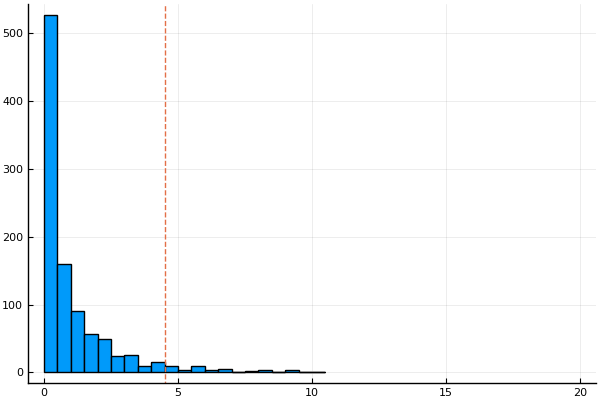

In [11]:
histogram(dd12, xlim=[0, 20], legend=false)
vline!([deltaD], linestyle=:dash)

In [12]:
sum(dd12 .>= deltaD)

42

In [13]:
p_value = sum(dd12 .>= deltaD) / length(dd12)

0.042

In [14]:
α = 0.05
quantile(dd12, 1-α)

4.363395789286505

有意水準5%では上記の数値くらいまでの逸脱度の差は「よくある差」だと判断できる。

### 3.4.2 方法(2) カイ二乗分布を使った近似計算法

JuliaにRのようなANOVAは無さそうなので、コード例をそのままJuliaに移植することはできない。でもカイ二乗分布の累積分布関数を使ってp値を求めることはできる。

In [15]:
fit1 = glm(@formula(y ~ 1), d, Poisson(), LogLink())
fit2 = glm(@formula(y ~ x), d, Poisson(), LogLink())
dd12 = deviance(fit1) - deviance(fit2)
1 - cdf(Chisq(1), dd12)

0.03361969100898521